# Урок 8. Работа с данными
# Домашняя работа

1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.

2. Загрузите датасет в pandas DataFrame под названием df.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


3. Выполните предварительную обработку данных, выполнив следующие шаги: a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). b. Проверьте и обработайте любые дублирующиеся строки в датасете. c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)

In [7]:
from scipy.stats import shapiro, mode
import numpy as np

In [8]:
def fill_missing_values(column):
    non_null_data = column.dropna()
    stat, p = shapiro(non_null_data)
    if p > 0.05:
        fill_value = non_null_data.mean() 
    else:
        fill_value = non_null_data.median()
    return column.fillna(fill_value)

In [9]:
for col in df.columns:
    if df[col].dtype in [np.float64, np.int64]:
        df[col] = fill_missing_values(df[col])
    else:
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

df.info()

In [10]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

In [11]:
duplicates = df.duplicated()
duplicates_df = df[duplicates]
duplicates_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


4. Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

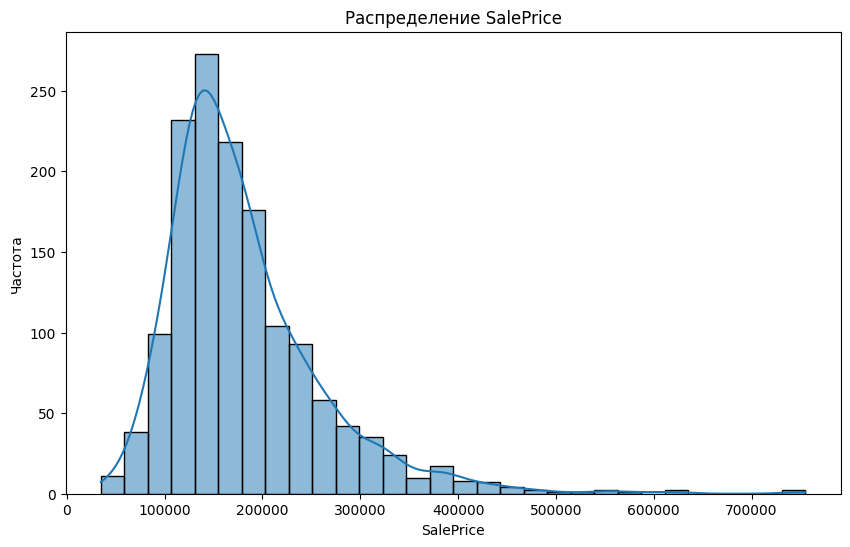

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Распределение SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.show()

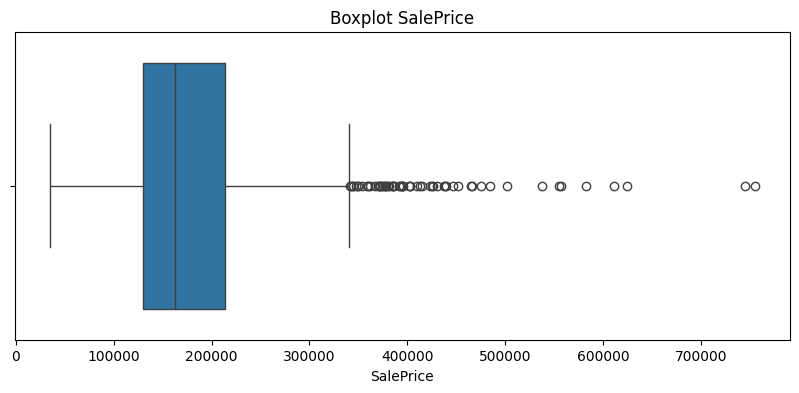

In [15]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot SalePrice')
plt.xlabel('SalePrice')
plt.show()

In [16]:
stat, p = shapiro(df['SalePrice'])
print(f"Shapiro-Wilk Test: W={stat}, p-value={p}")

Shapiro-Wilk Test: W=0.8696714665902145, p-value=3.2061412312021656e-33


In [17]:
df['SalePrice_log'] = np.log1p(df['SalePrice'])

In [18]:
stat, p = shapiro(df['SalePrice'])
print(f"Shapiro-Wilk Test for Log-transformed Data: W={stat}, p-value={p}")

Shapiro-Wilk Test for Log-transformed Data: W=0.8696714665902145, p-value=3.2061412312021656e-33


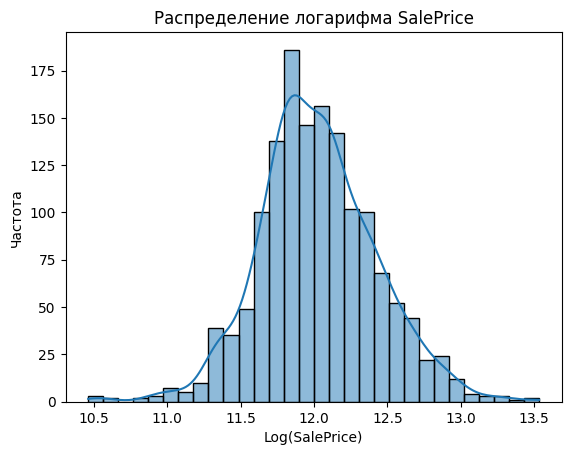

In [19]:
sns.histplot(df['SalePrice_log'], kde=True, bins=30)
plt.title('Распределение логарифма SalePrice')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Частота')
plt.show()

In [20]:
df = pd.read_csv('train.csv')
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
saleprice_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("Топ-10 признаков с наибольшей корреляцией с SalePrice:")
print(saleprice_corr.head(10))

Топ-10 признаков с наибольшей корреляцией с SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


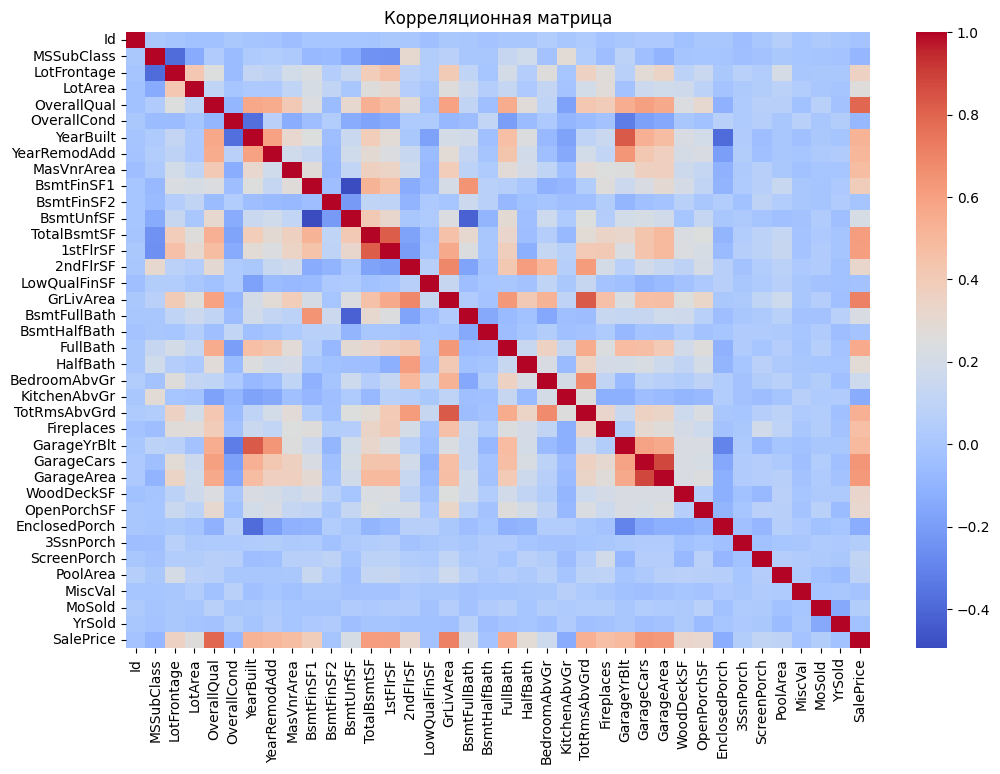

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

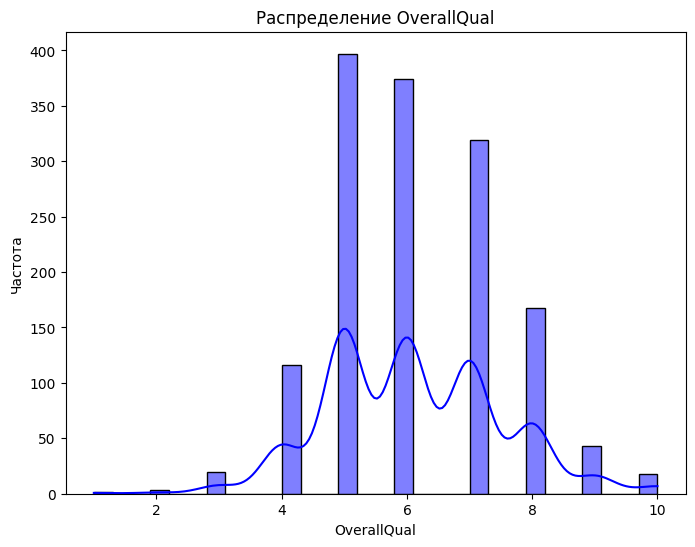

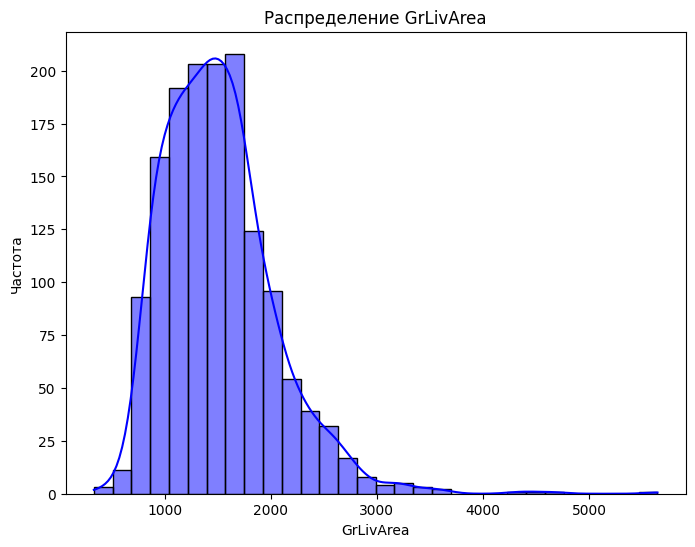

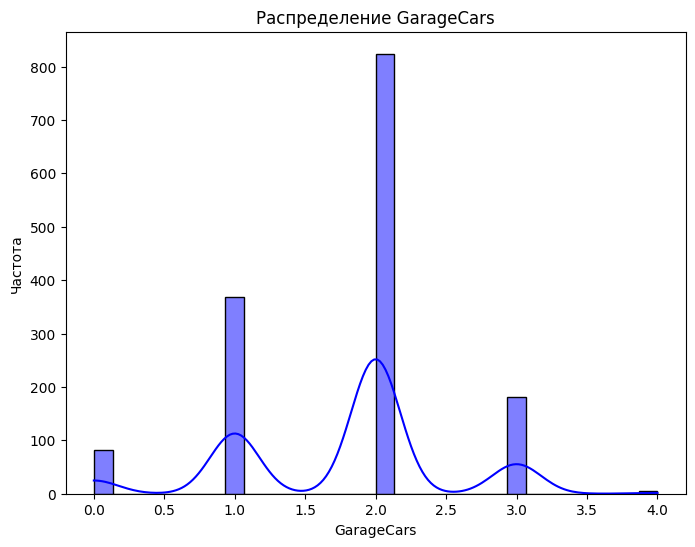

In [22]:
features = ['OverallQual', 'GrLivArea', 'GarageCars']
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.show()

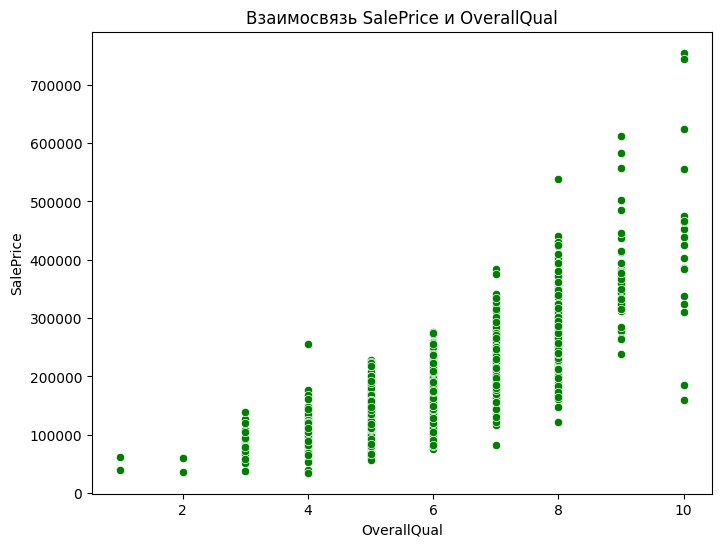

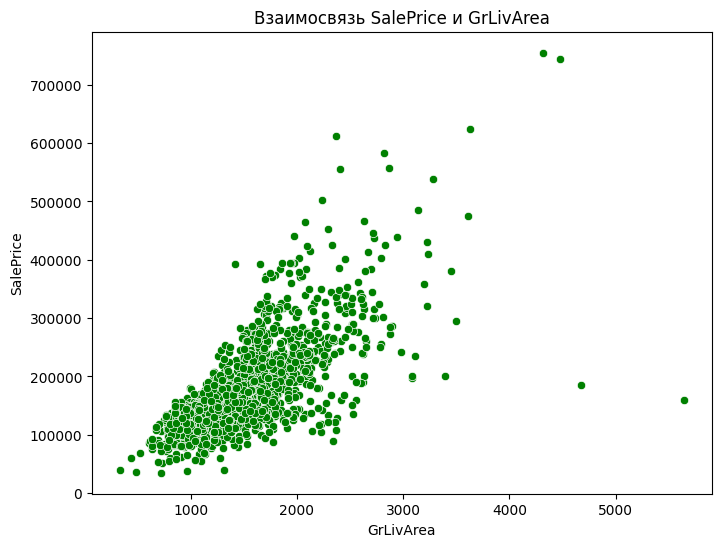

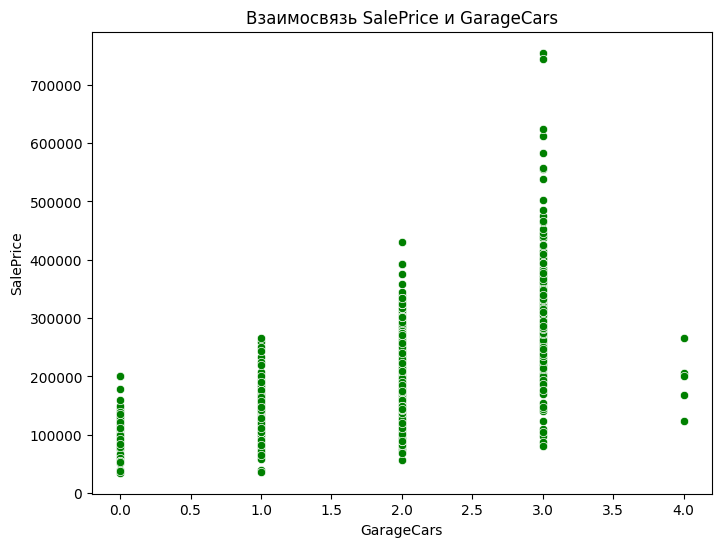

In [23]:
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['SalePrice'], color='green')
    plt.title(f'Взаимосвязь SalePrice и {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

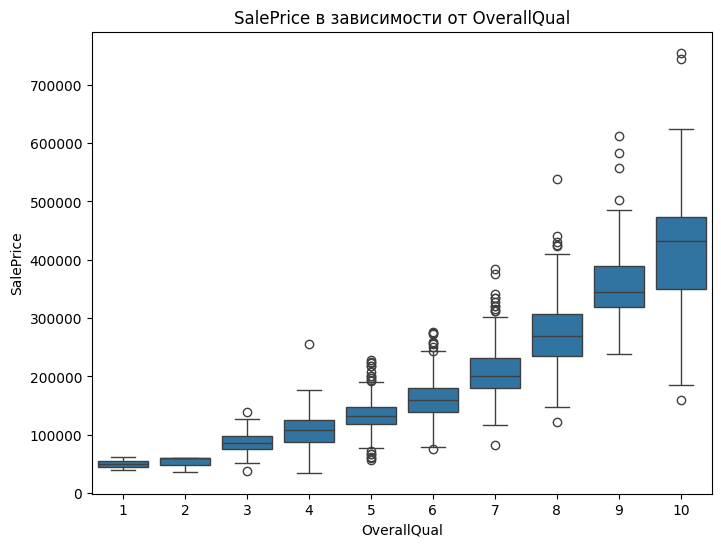

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title('SalePrice в зависимости от OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

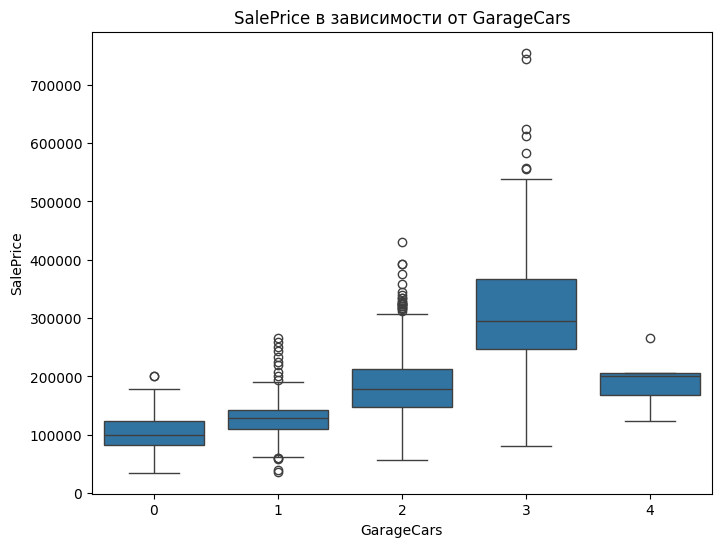

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['GarageCars'], y=df['SalePrice'])
plt.title('SalePrice в зависимости от GarageCars')
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

5. Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
ordered_cols = ['ExterQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
for col in ordered_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
nominal_cols = [col for col in categorical_cols if col not in ordered_cols]
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
print(f"Итоговые размеры таблицы: {df.shape}")

Итоговые размеры таблицы: (1460, 231)


In [28]:
df['TotalAreaSquare'] = df['GrLivArea'] + df['TotalBsmtSF']
df['Age'] = df['YrSold'] - df['YearBuilt']
df['TotalBath'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']
df['GarageTotalSquare'] = df['GarageArea'] + df['GarageCars']
print(df[['TotalAreaSquare', 'Age', 'TotalBath', 'GarageTotalSquare']].head())

   TotalAreaSquare  Age  TotalBath  GarageTotalSquare
0             2566    5          4                550
1             2524   31          3                462
2             2706    7          4                610
3             2473   91          2                645
4             3343    8          4                839


6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [29]:
df.to_csv('cleaned_house_prices.csv', index=False)